## Business Goals
X Education want to develop a model to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

Goal of the Case Study :

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2. There are some more problems presented by the company which your model should be able to adjust to if the company requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you make recommendations.

# 1. Importing Libraries

In [437]:

import numpy as np
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score



from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [438]:
import warnings
warnings.filterwarnings('ignore')

In [439]:
pd.set_option('display.max_columns', 77)
pd.set_option('display.max_rows', 77)

# 2. Data Understanding

In [440]:
lead = pd.read_csv(r'C:\Users\dhaval.gala\OneDrive - Accenture\Desktop\New folder (2)\Lead Scoring Assignment\Leads.csv')
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [441]:
#info about the column types etc. 
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Insight: There are columns with some null values. 

## Checking Null value calculations

In [442]:
lead = lead.replace('select',np.nan)

In [443]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [444]:

null_perc = pd.DataFrame(round((lead.isnull().sum())*100/lead.shape[0],2)).reset_index()
null_perc.columns = ['Column Name', 'Null Values Percentage']
null_value = pd.DataFrame(lead.isnull().sum()).reset_index()
null_value.columns = ['Column Name', 'Null Values']
null_lead = pd.merge(null_value, null_perc, on='Column Name')
null_lead.sort_values("Null Values", ascending = False)

,Column Name,Null Values,Null Values Percentage
25,Lead Quality,4767,51.59
30,Asymmetrique Activity Index,4218,45.65
33,Asymmetrique Profile Score,4218,45.65
32,Asymmetrique Activity Score,4218,45.65
31,Asymmetrique Profile Index,4218,45.65
24,Tags,3353,36.29
28,Lead Profile,2709,29.32
15,What matters most to you in choosing a course,2709,29.32
14,What is your current occupation,2690,29.11
11,Country,2461,26.63


Insight:  Seven columns contain more than 45% unknowns and should be eliminated because imputing these columns would generate bias. 

## Duplicate Analysis

In [445]:
print("Total number of duplicate values in Prospect ID column :" , lead.duplicated(subset = 'Prospect ID').sum())
print("Total number of duplicate values in Lead Number column :" , lead.duplicated(subset = 'Lead Number').sum())

Total number of duplicate values in Prospect ID column : 0
Total number of duplicate values in Lead Number column : 0


Insight: Prospect ID and Lead number are unique columns 

# 3. Data Cleaning 

## High Null Columns

Strategy: 
Columns with more than 45% null values will be removed. Prospect ID and Lead Number, are merely placeholders for the Contacted People's ID number and can be eliminated. Some variables will not be available for model construction since these attributes will not be available until the lead is contacted.

In [446]:
cols_to_drop = cols_to_drop = ['Prospect ID','Lead Number','How did you hear about X Education','Lead Profile',
                'Lead Quality','Asymmetrique Profile Score','Asymmetrique Activity Score',
               'Asymmetrique Activity Index','Asymmetrique Profile Index','Tags','Last Notable Activity']

In [447]:
#dropping unnecessary columns

lead.drop(cols_to_drop, 1, inplace = True)
len(lead.columns)


26

Insight:10 columns with high null values or information that would not be accessible to models when they run because they were calculated or selected by salespeople when they contacted potential prospects were successfully removed.

## Categorial and Numerical values

In [448]:
categorical_col = lead.select_dtypes(exclude =["number"]).columns.values
numerical_col = lead.select_dtypes(include =["number"]).columns.values
print("CATEGORICAL FEATURES : \n {} \n\n".format(categorical_col))
print("NUMERICAL FEATURES : \n {} ".format(numerical_col))

CATEGORICAL FEATURES : 
 ['Lead Origin' 'Lead Source' 'Do Not Email' 'Do Not Call' 'Last Activity'
 'Country' 'Specialization' 'What is your current occupation'
 'What matters most to you in choosing a course' 'Search' 'Magazine'
 'Newspaper Article' 'X Education Forums' 'Newspaper'
 'Digital Advertisement' 'Through Recommendations'
 'Receive More Updates About Our Courses'
 'Update me on Supply Chain Content' 'Get updates on DM Content' 'City'
 'I agree to pay the amount through cheque'
 'A free copy of Mastering The Interview'] 


NUMERICAL FEATURES : 
 ['Converted' 'TotalVisits' 'Total Time Spent on Website'
 'Page Views Per Visit'] 


## Categorial : null value 

In [449]:
# Checking unique values and null values for the categorical columns
def Cat_info(df, categorical_column):
    df_result = pd.DataFrame(columns=["columns","values","unique_values","null_values","null_percent"])
    
    df_temp=pd.DataFrame()
    for value in categorical_column:
        df_temp["columns"] = [value]
        df_temp["values"] = [df[value].unique()]
        df_temp["unique_values"] = df[value].nunique()
        df_temp["null_values"] = df[value].isna().sum()
        df_temp["null_percent"] = (df[value].isna().sum()/len(df)*100).round(1)
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("null_values", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [450]:
df_cat = Cat_info(lead, categorical_col)
df_cat

,values,unique_values,null_values,null_percent
columns,,,,
What matters most to you in choosing a course,"[Better Career Prospects, nan, Flexibility & C...",3,2709,29.3
What is your current occupation,"[Unemployed, Student, nan, Working Professiona...",6,2690,29.1
Country,"[nan, India, Russia, Kuwait, Oman, United Arab...",38,2461,26.6
Specialization,"[Select, Business Administration, Media and Ad...",19,1438,15.6
City,"[Select, Mumbai, nan, Thane & Outskirts, Other...",7,1420,15.4
Last Activity,"[Page Visited on Website, Email Opened, Unreac...",17,103,1.1
Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",21,36,0.4
Lead Origin,"[API, Landing Page Submission, Lead Add Form, ...",5,0,0.0
Digital Advertisement,"[No, Yes]",2,0,0.0


Insight: There are columns that only have one category. "Select" is one of the values in a number of the columns and must consider these to be null values. The data values in these columns need to be changed.

In [451]:
# Adding the columns where there is only one category value to col_to_drop

cols_to_drop = df_cat[df_cat['unique_values']==1].index.values.tolist() 
cols_to_drop

['I agree to pay the amount through cheque',
 'Get updates on DM Content',
 'Update me on Supply Chain Content',
 'Receive More Updates About Our Courses',
 'Magazine']

In [452]:
#dropping unnecessary columns

lead.drop(cols_to_drop, 1, inplace = True)
len(lead.columns)

21

checking the null values and columns details for Categorial columns

In [453]:
categorical_col = lead.select_dtypes(exclude =["number"]).columns.values
new_cat = Cat_info(lead, categorical_col)
new_cat

,values,unique_values,null_values,null_percent
columns,,,,
What matters most to you in choosing a course,"[Better Career Prospects, nan, Flexibility & C...",3,2709,29.3
What is your current occupation,"[Unemployed, Student, nan, Working Professiona...",6,2690,29.1
Country,"[nan, India, Russia, Kuwait, Oman, United Arab...",38,2461,26.6
Specialization,"[Select, Business Administration, Media and Ad...",19,1438,15.6
City,"[Select, Mumbai, nan, Thane & Outskirts, Other...",7,1420,15.4
Last Activity,"[Page Visited on Website, Email Opened, Unreac...",17,103,1.1
Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",21,36,0.4
X Education Forums,"[No, Yes]",2,0,0.0
Through Recommendations,"[No, Yes]",2,0,0.0


Now  proceeding with addressing individual columns for null values

### City

In [454]:
lead['City'].value_counts(normalize=True)*100

Mumbai                         41.202046
Select                         28.759591
Thane & Outskirts               9.616368
Other Cities                    8.772379
Other Cities of Maharashtra     5.843990
Other Metro Cities              4.859335
Tier II Cities                  0.946292
Name: City, dtype: float64

In [455]:
# Let's check how City and Country are connected with each other
lead.groupby(['Country','City'])['Country'].count()

Country        City              
Australia      Mumbai                6
               Other Cities          2
               Select                1
               Thane & Outskirts     3
Bahrain        Mumbai                1
                                    ..
United States  Other Metro Cities    4
               Select                7
               Thane & Outskirts     5
               Tier II Cities        1
Vietnam        Mumbai                1
Name: Country, Length: 98, dtype: int64

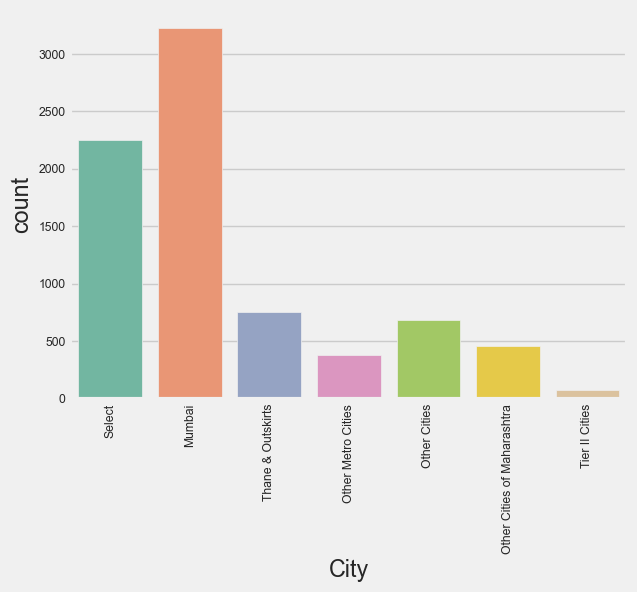

In [456]:
style.use('fivethirtyeight')
ax = sns.countplot(lead['City'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

Insight: We are unable to impute using mode since doing so will bias the whole dataset because there are over 40% of unknown values. Another platform for online instruction is X-Education. Since prospective students may attend any course online from anywhere, providing city information will be useless. The column will no longer be taken into consideration.

In [457]:
lead.drop("City",axis=1, inplace = True)
len(lead.columns)

20

## Specialization

In [458]:
lead['Specialization'].value_counts(normalize = True)*100

Select                               24.891054
Finance Management                   12.509613
Human Resource Management            10.869008
Marketing Management                 10.740836
Operations Management                 6.447065
Business Administration               5.165342
IT Projects Management                4.691105
Supply Chain Management               4.473212
Banking, Investment And Insurance     4.332223
Travel and Tourism                    2.601897
Media and Advertising                 2.601897
International Business                2.281466
Healthcare Management                 2.037939
Hospitality Management                1.461164
E-COMMERCE                            1.435529
Retail Management                     1.281723
Rural and Agribusiness                0.935658
E-Business                            0.730582
Services Excellence                   0.512689
Name: Specialization, dtype: float64

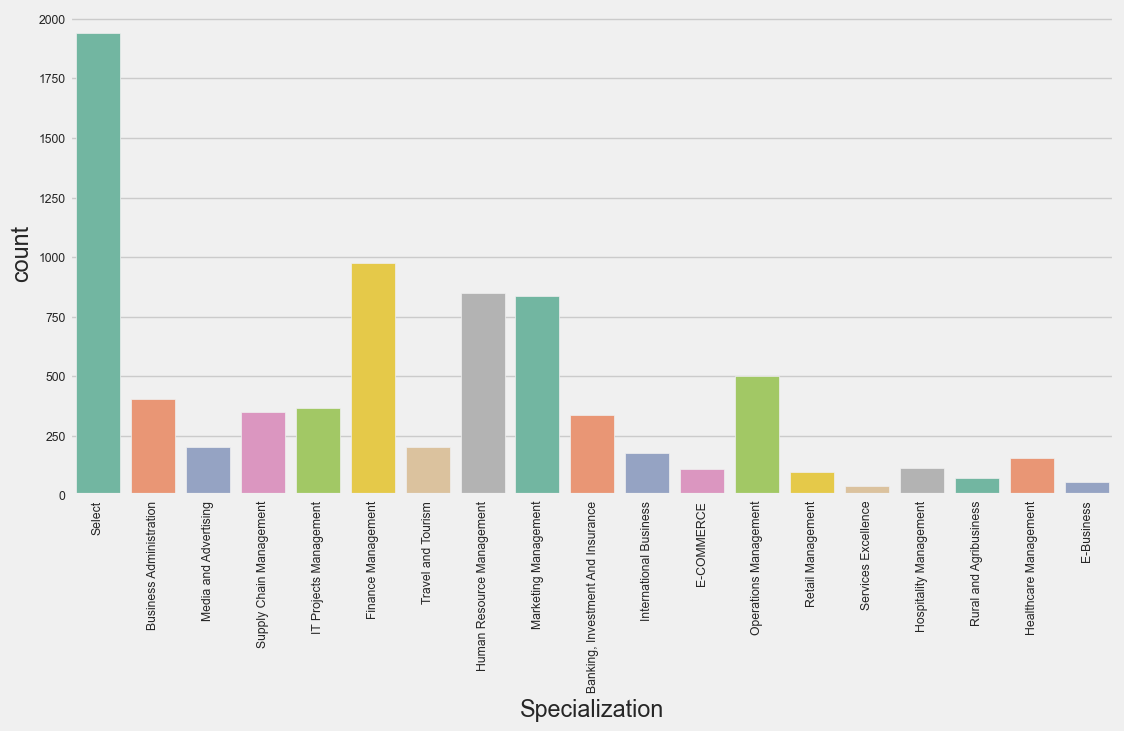

In [459]:
plt.figure(figsize=(12,6))
ax = sns.countplot(lead['Specialization'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

Insight: It is conceivable that the lead has no speciality or is a student with no job experience, in which case he or she has not entered any value. To replace the null values, we will add a new category named 'Others'.

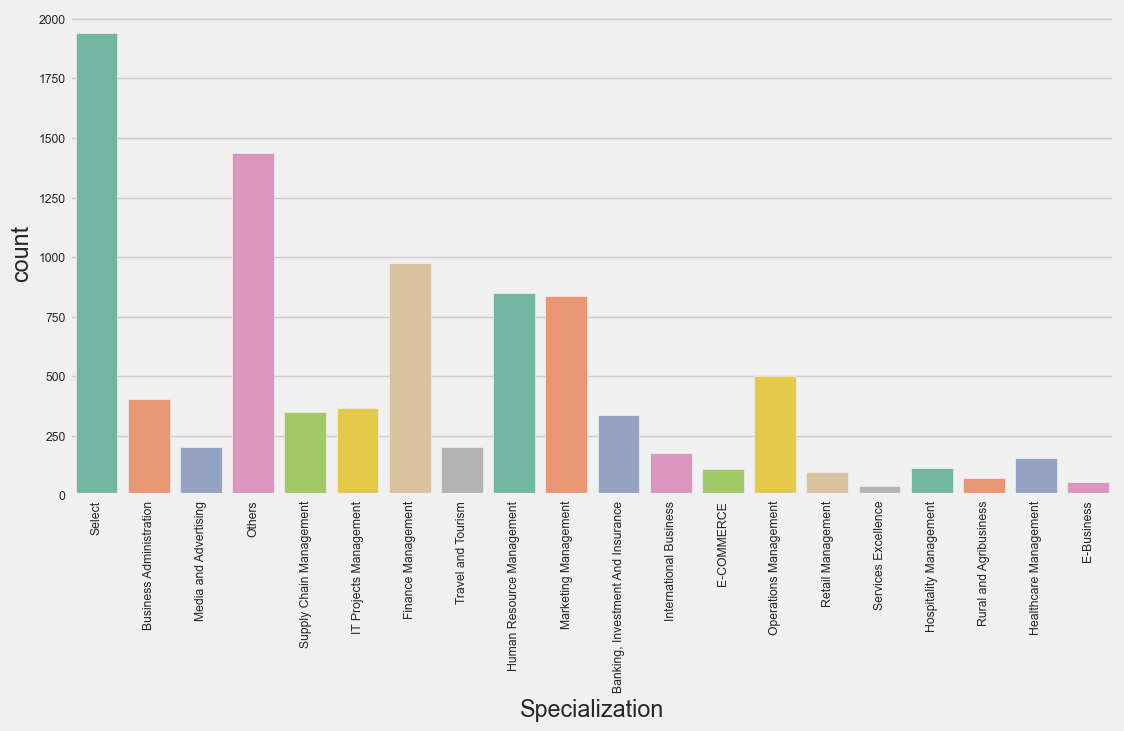

In [460]:
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')
plt.figure(figsize=(12,6))
ax = sns.countplot(lead['Specialization'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

## choosing a course

In [461]:
lead['What matters most to you in choosing a course'].value_counts(normalize = True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

Insight: Data is distorted, we may remove the column.

In [462]:
lead.drop('What matters most to you in choosing a course', axis = 1, inplace=True)
len(lead.columns)

19

## Current occupation

In [463]:
lead['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

Insight: "Unemployed" accounts for 85.5% of the values. When we impute the data as "Unemployed," the data becomes skewed. As a result, we will assign the value "Unknown".

In [464]:
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unknown')
lead['What is your current occupation'].value_counts(normalize = True)*100

Unemployed              60.606061
Unknown                 29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

## Country

In [465]:
#Let's check how is the Country data distributed
lead['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

Insight: Because 95% of the data is mapped as India, the country data is severely biassed. Country data, like city data, is not necessary for Model construction because X-Education is an online platform. We will also remove the nation columns.

In [466]:
lead.drop('Country', axis = 1, inplace = True)
len(lead.columns)

18

In [467]:
print("Number of null values in Last Activity column is : ", lead['Last Activity'].isnull().sum())
print("Percentage of null values in Last Activity column is : ", round(lead['Last Activity'].isnull().sum()/lead.shape[0]*100,2))

Number of null values in Last Activity column is :  103
Percentage of null values in Last Activity column is :  1.11


In [468]:
lead['Last Activity'].value_counts(normalize = True)*100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

Insight: While we are uncertain what may be the Last action, we will replace it with the most frequent activity "Email Opened".

In [469]:
lead['Last Activity'] = lead['Last Activity'].replace(np.nan, 'Email Opened')
print("Number of null values in Last Activity column is : ", lead['Last Activity'].isnull().sum())

Number of null values in Last Activity column is :  0


## Lead source

In [470]:
print("Number of null values in Lead Source column is : ", lead['Lead Source'].isnull().sum())
print("Percentage of null values in Lead Source column is : ", round(lead['Lead Source'].isnull().sum()/lead.shape[0]*100,2))

Number of null values in Lead Source column is :  36
Percentage of null values in Lead Source column is :  0.39


In [471]:
lead['Lead Source'].value_counts(normalize = True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

Insight: Because Google appears to be the most often utilised Lead Source, we will replace null values with Google. There is a category called 'google,' which is synonymous with 'Google.' We will change the settings.

In [472]:
lead['Lead Source'] = lead['Lead Source'].replace(np.nan, 'Google')
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')
print("Number of null values in Lead Source column is : ", lead['Lead Source'].isnull().sum())

Number of null values in Lead Source column is :  0


Insight: All Categorical Columns have been successfully imputed. Let's have a look at some number columns now.

## Numerical columns null value treatment

In [473]:
# Checking unique values and null values for the categorical columns
def Num_info(df, numeric_column):
    df_result = pd.DataFrame(columns=["columns","null_values","null_percent"])
    
    df_temp=pd.DataFrame()
    for value in numeric_column:
        df_temp["columns"] = [value]
        df_temp["null_values"] = df[value].isna().sum()
        df_temp["null_percent"] = (df[value].isna().sum()/len(df)*100).round(1)
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("null_values", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [474]:
df_num = Num_info(lead,numerical_col)
df_num

,null_values,null_percent
columns,,
TotalVisits,137,1.5
Page Views Per Visit,137,1.5
Converted,0,0.0
Total Time Spent on Website,0,0.0


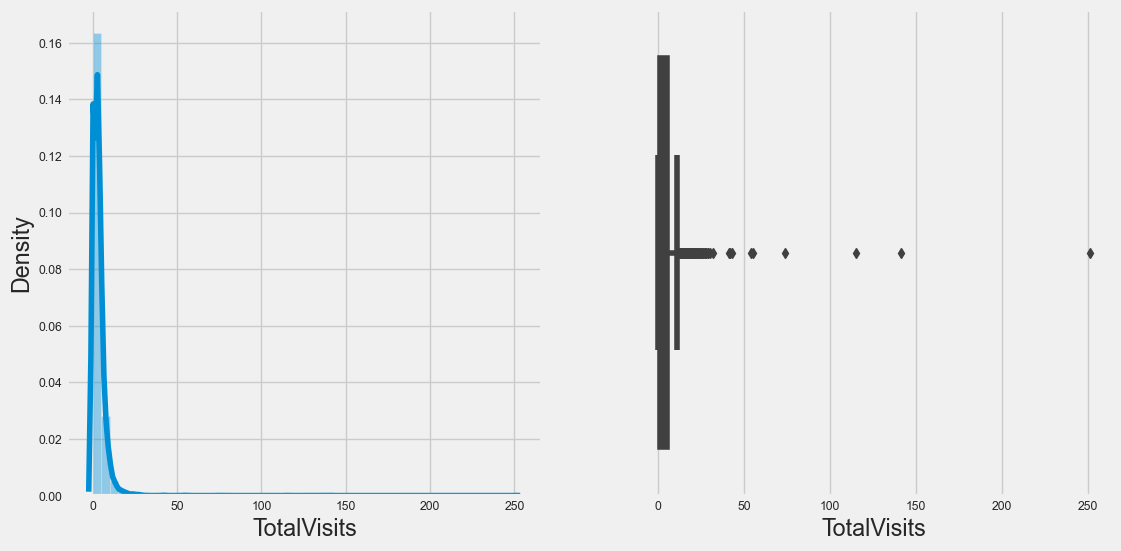

In [475]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(lead['TotalVisits'])
plt.subplot(1,2,2)
sns.boxplot(lead['TotalVisits'])
plt.show()

Insight: Because there are several outliers in the data, we will impute with the median value rather than the mean value.

In [476]:
lead['TotalVisits'].fillna(lead['TotalVisits'].median(), inplace=True)
lead['TotalVisits'].isnull().sum()

0

## page views per visit

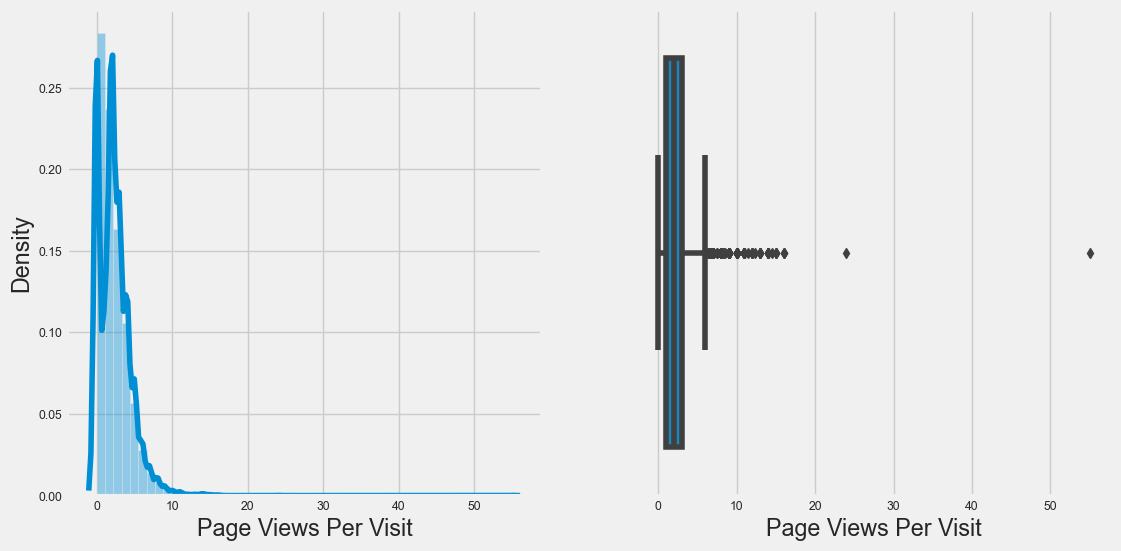

In [477]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(lead['Page Views Per Visit'])
plt.subplot(1,2,2)
sns.boxplot(lead['Page Views Per Visit'])
plt.show()

Insight: Because there are several outliers in the data, we will impute with the median rather than the mean number.

In [478]:
lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median(), inplace=True)
lead['Page Views Per Visit'].isnull().sum()

0

# 4. Exploratory Data Analysis

In [479]:
converted = lead['Converted'].value_counts().rename_axis('unique_values').to_frame('counts')
converted

,counts
unique_values,
0,5679
1,3561


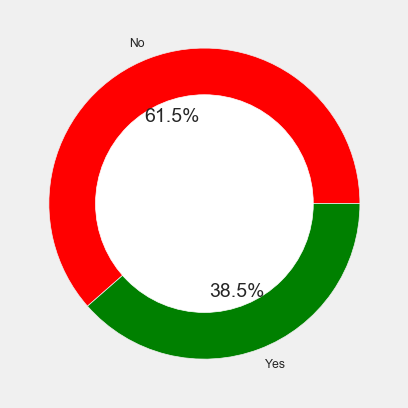

In [523]:

my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(converted.counts, labels = ['No','Yes'],colors = ['red','green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

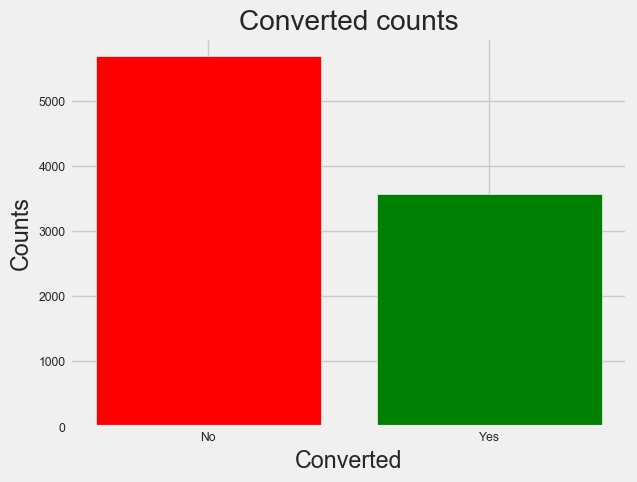

In [524]:
counts = converted.counts
labels = ['No', 'Yes']
colors = ['red', 'green']

plt.bar(labels, counts, color=colors)
plt.title('Converted counts')
plt.xlabel('Converted')
plt.ylabel('Counts')

plt.show()

Insight: In the lead conversion ratio, 38.5% of visitors turned to leads, whereas 61.5% did not. As a result, it appears to be a well-balanced dataset.

## Graph functions

In [482]:
# function for plotting repetitive countplots in univariate categorical analysis on the lead dataset
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t Converted; 
# 2. Percentage of converted leads within column

def univariate_categorical(feature,label_rotation=False,horizontal_layout=True):
    temp_count = lead[feature].value_counts()
    temp_perc = lead[feature].value_counts(normalize = True)
    df1 = pd.DataFrame({feature: temp_count.index,'Total Leads': temp_count.values,'% Values': temp_perc.values * 100})
    print(df1)
    
    # Calculate the percentage of Converted=1 per category value
    cat_perc = lead[[feature, 'Converted']].groupby([feature],as_index=False).mean()
    cat_perc["Converted"] = cat_perc["Converted"]*100
    cat_perc.sort_values(by='Converted', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))   
    # 1. Subplot 1: Count plot of categorical column
    sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=lead,
                    hue ="Converted",
                    order=cat_perc[feature],
                    palette=['r','g'])

    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    ax1.legend(['Not Converted','Converted'])
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='Converted', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Converted leads [%]', fontsize=15)
    plt.xlabel(feature,fontsize=15) 
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + "( Converted % )", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

Insight: The vast bulk of the dataset's attributes are categorical in nature. Starting off, let's do segmented univariate analysis on each category feature. The total number of converted and non-converted leads in each category are shown in bar graphs.

In [483]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview'],
      dtype='object')

In [484]:
# Renaming some of the column headers which has long header

lead.rename(columns={'What is your current occupation': 'Occupation', 
                     'Through Recommendations': 'Recommendation',
                     'A free copy of Mastering The Interview': 'Free Copy'                   
                    },inplace = True)
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization', 'Occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Recommendation', 'Free Copy'],
      dtype='object')

## Univariate Anlysis - categorical


               Lead Origin  Total Leads   % Values
0  Landing Page Submission         4886  52.878788
1                      API         3580  38.744589
2            Lead Add Form          718   7.770563
3              Lead Import           55   0.595238
4           Quick Add Form            1   0.010823


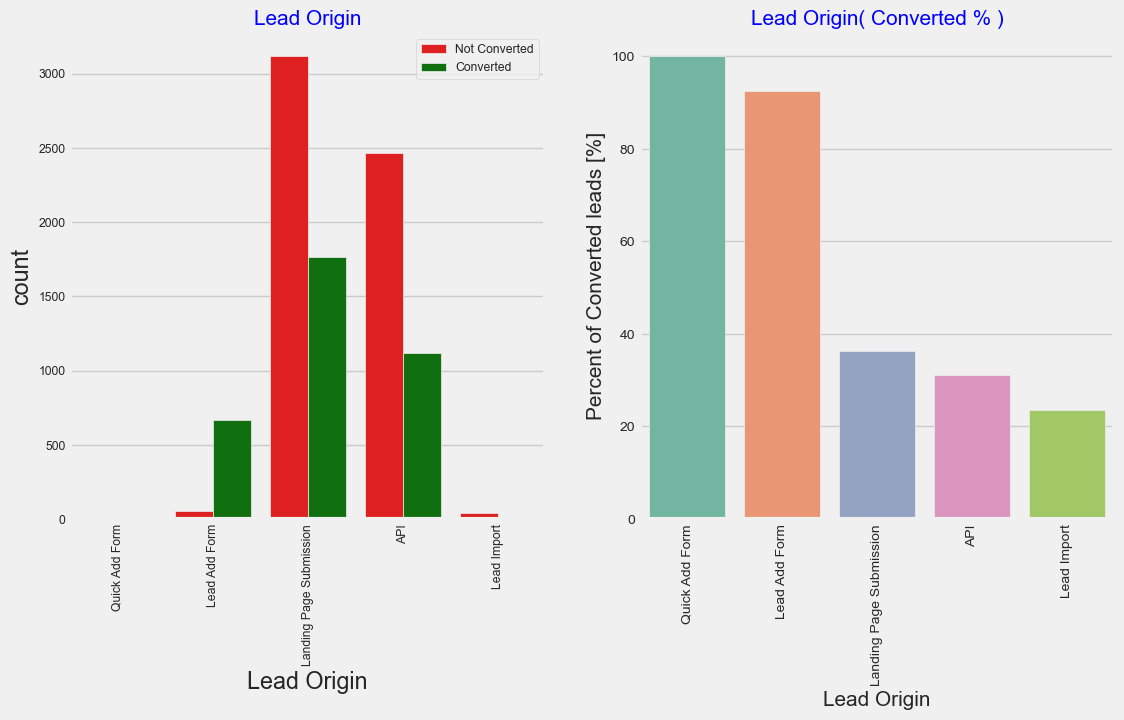

In [485]:
#Run the function to get plot categorical plots 
univariate_categorical("Lead Origin",label_rotation=True)

Insight: Landing page submissions account for the majority of leads, and about 38% of them were converted. Next came API submissions, which had a conversion rate of about 30%.
There was just one lead from the Fast Add Form category, despite the fact that those leads are 100% converted. Over 90% of the 718 leads were from leads generated by the Lead Add Form, which had the highest conversion rate in this category.


There aren't many imported leads, and the conversion rate is also low.
We must focus more on enhancing lead conversion from API and Landing Page Submission sources and increasing lead generation through Lead Add Form if we want to increase overall lead conversion rates.


## Lead source

          Lead Source  Total Leads   % Values
0              Google         2909  31.482684
1      Direct Traffic         2543  27.521645
2          Olark Chat         1755  18.993506
3      Organic Search         1154  12.489177
4           Reference          534   5.779221
5    Welingak Website          142   1.536797
6      Referral Sites          125   1.352814
7            Facebook           55   0.595238
8                bing            6   0.064935
9          Click2call            4   0.043290
10       Social Media            2   0.021645
11          Live Chat            2   0.021645
12      Press_Release            2   0.021645
13  Pay per Click Ads            1   0.010823
14               blog            1   0.010823
15            WeLearn            1   0.010823
16   welearnblog_Home            1   0.010823
17     youtubechannel            1   0.010823
18            testone            1   0.010823
19             NC_EDM            1   0.010823


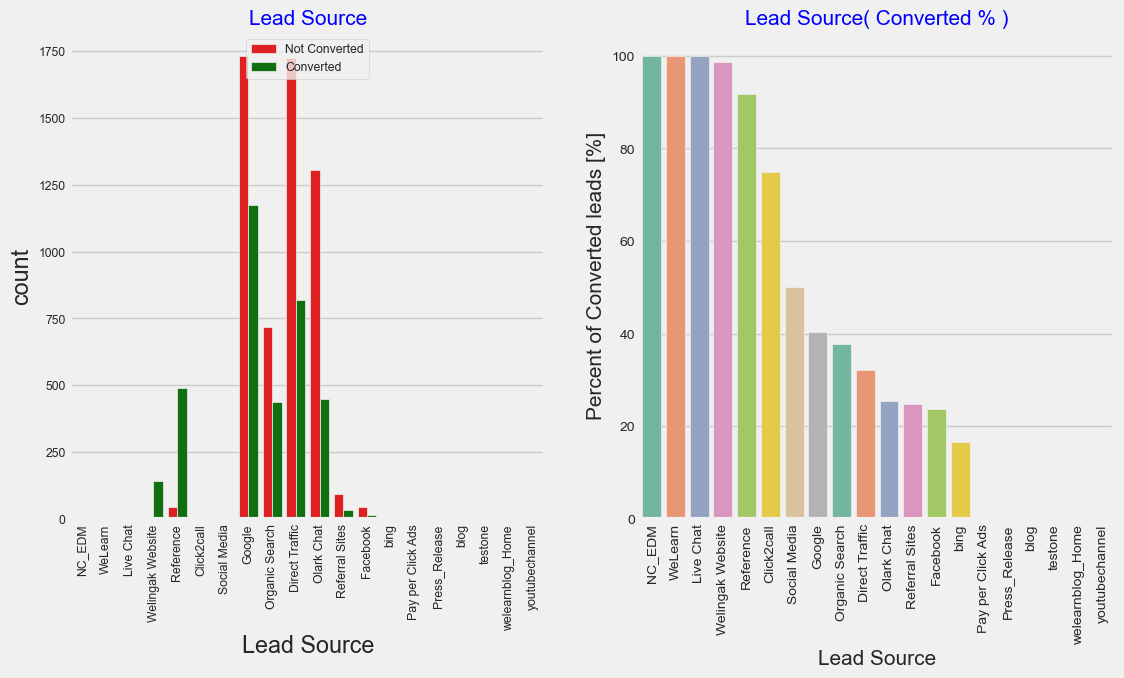

In [486]:
#Run the function to get plot categorical plots
univariate_categorical("Lead Source",label_rotation=True)

Strategy:
We will combine smaller lead sources as 'Other Sources'.

In [487]:
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other Sources')

        Lead Source  Total Leads   % Values
0            Google         2909  31.482684
1    Direct Traffic         2543  27.521645
2        Olark Chat         1755  18.993506
3    Organic Search         1154  12.489177
4         Reference          534   5.779221
5  Welingak Website          142   1.536797
6    Referral Sites          125   1.352814
7          Facebook           55   0.595238
8     Other Sources           23   0.248918


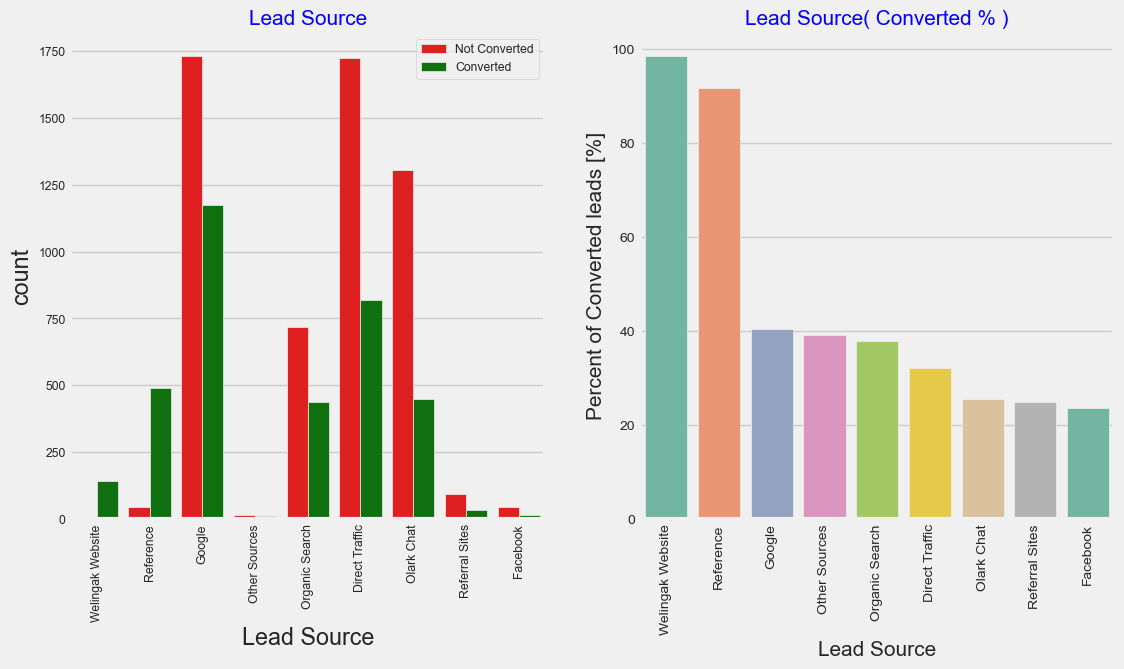

In [488]:
#Running the function again to check the updated statistics
univariate_categorical("Lead Source",label_rotation=True)

Insight: The majority of leads came from Google, with 40% of them converting. Direct traffic, organic search, and olark chat were the next most popular lead sources, with 35%, 38%, and 30% conversion rates, respectively. Out of a total of 534 leads, a lead produced by a referral had a conversion rate of more than 90%. On the Welingak website, the lead conversion rate is close to 100%. For the purpose of increasing lead conversion, this alternative should be further examined. Measures should be put in place to entice current members to refer additional people in order to increase lead count.

## Do not Email

  Do Not Email  Total Leads   % Values
0           No         8506  92.056277
1          Yes          734   7.943723


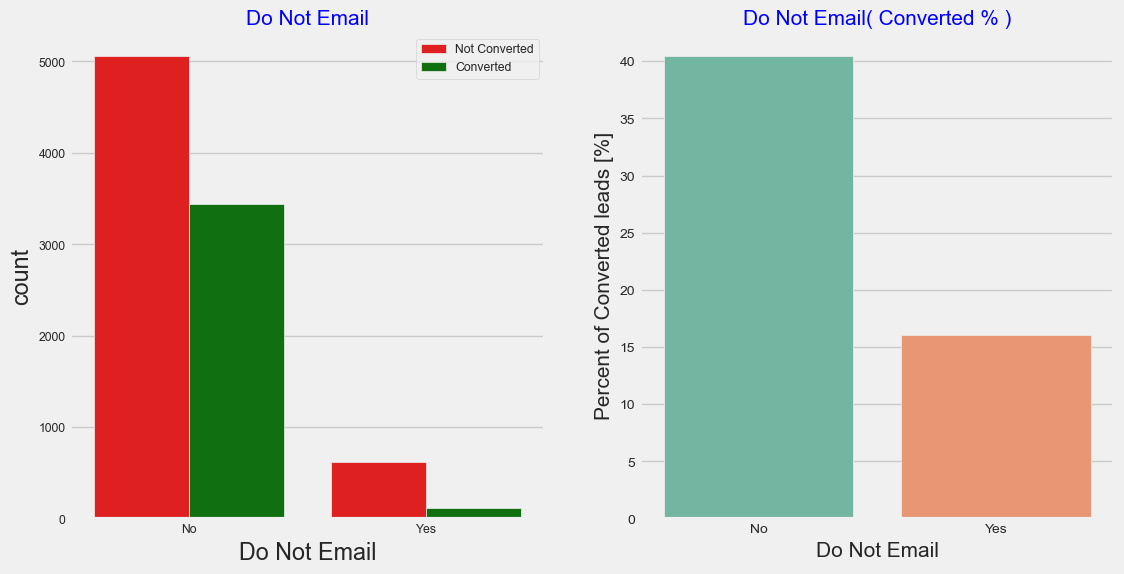

In [489]:
#Run the function to get plot categorical plots
univariate_categorical("Do Not Email")

Insight: The vast majority of individuals (92%) are fine with getting email.
Individuals that are comfortable with email have a 40% conversion rate.
Individuals who have opted out of receiving emails have a lower conversion rate (just 15%).

## Last Activity

                   Last Activity  Total Leads   % Values
0                   Email Opened         3540  38.311688
1                       SMS Sent         2745  29.707792
2        Olark Chat Conversation          973  10.530303
3        Page Visited on Website          640   6.926407
4              Converted to Lead          428   4.632035
5                  Email Bounced          326   3.528139
6             Email Link Clicked          267   2.889610
7      Form Submitted on Website          116   1.255411
8                    Unreachable           93   1.006494
9                   Unsubscribed           61   0.660173
10      Had a Phone Conversation           30   0.324675
11            Approached upfront            9   0.097403
12  View in browser link Clicked            6   0.064935
13                Email Received            2   0.021645
14             Email Marked Spam            2   0.021645
15    Visited Booth in Tradeshow            1   0.010823
16        Resubscribed to email

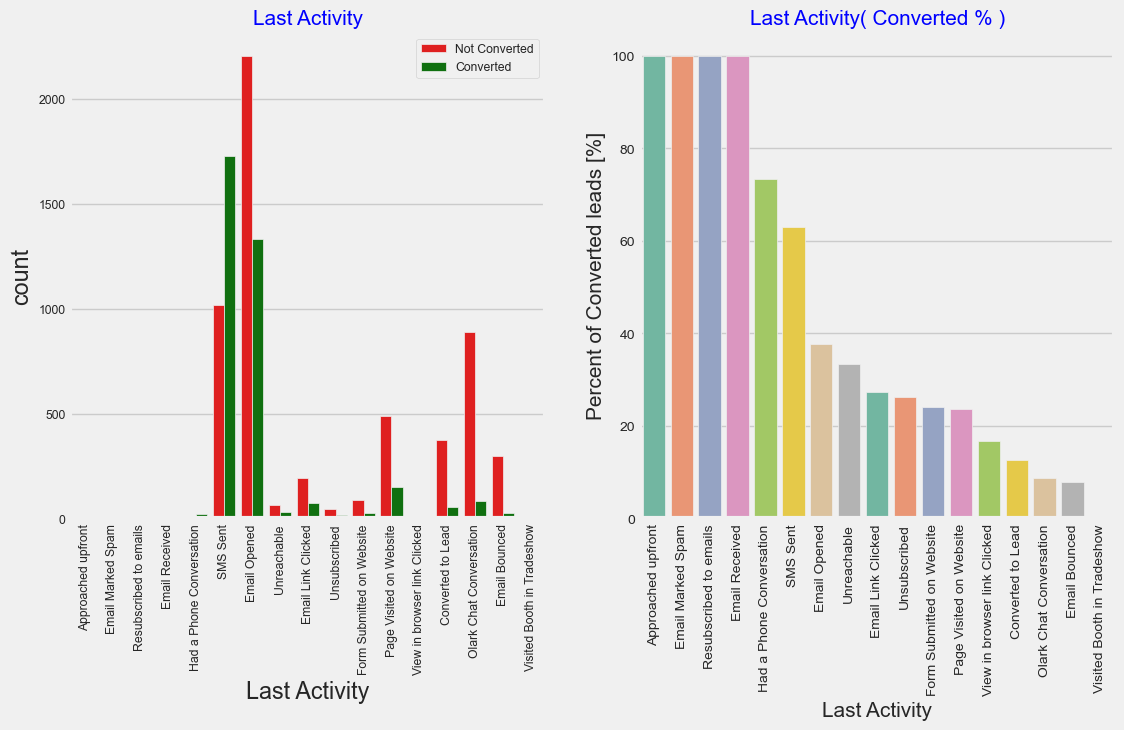

In [490]:
#Run the function to get plot categorical plots
univariate_categorical("Last Activity",label_rotation=True)

### Strategy:
We will combine smaller Last Activity values as 'Other Activity'.

In [491]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

                Last Activity  Total Leads   % Values
0                Email Opened         3540  38.311688
1                    SMS Sent         2745  29.707792
2     Olark Chat Conversation          973  10.530303
3     Page Visited on Website          640   6.926407
4           Converted to Lead          428   4.632035
5               Email Bounced          326   3.528139
6          Email Link Clicked          267   2.889610
7   Form Submitted on Website          116   1.255411
8                 Unreachable           93   1.006494
9                Unsubscribed           61   0.660173
10             Other Activity           51   0.551948


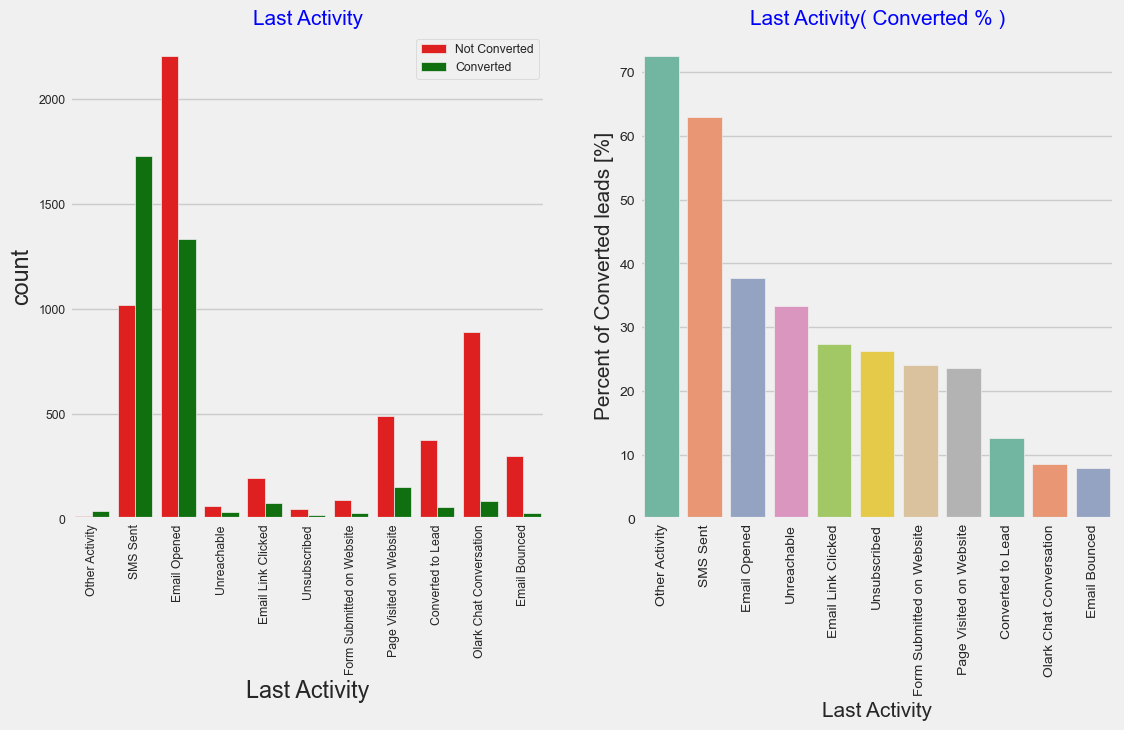

In [492]:
#Run the function to get plot categorical plots
univariate_categorical("Last Activity",label_rotation=True)

### Insight: 
The majority of leads have their Email open as their most recent action.
Lead conversion is quite high (70%) after merging smaller Last Activity kinds like Other Activity.
The conversion rate for leads with the most recent action as an SMS sent is around 60%.

## Specialization

                       Specialization  Total Leads   % Values
0                              Select         1942  21.017316
1                              Others         1438  15.562771
2                  Finance Management          976  10.562771
3           Human Resource Management          848   9.177489
4                Marketing Management          838   9.069264
5               Operations Management          503   5.443723
6             Business Administration          403   4.361472
7              IT Projects Management          366   3.961039
8             Supply Chain Management          349   3.777056
9   Banking, Investment And Insurance          338   3.658009
10                 Travel and Tourism          203   2.196970
11              Media and Advertising          203   2.196970
12             International Business          178   1.926407
13              Healthcare Management          159   1.720779
14             Hospitality Management          114   1.233766
15      

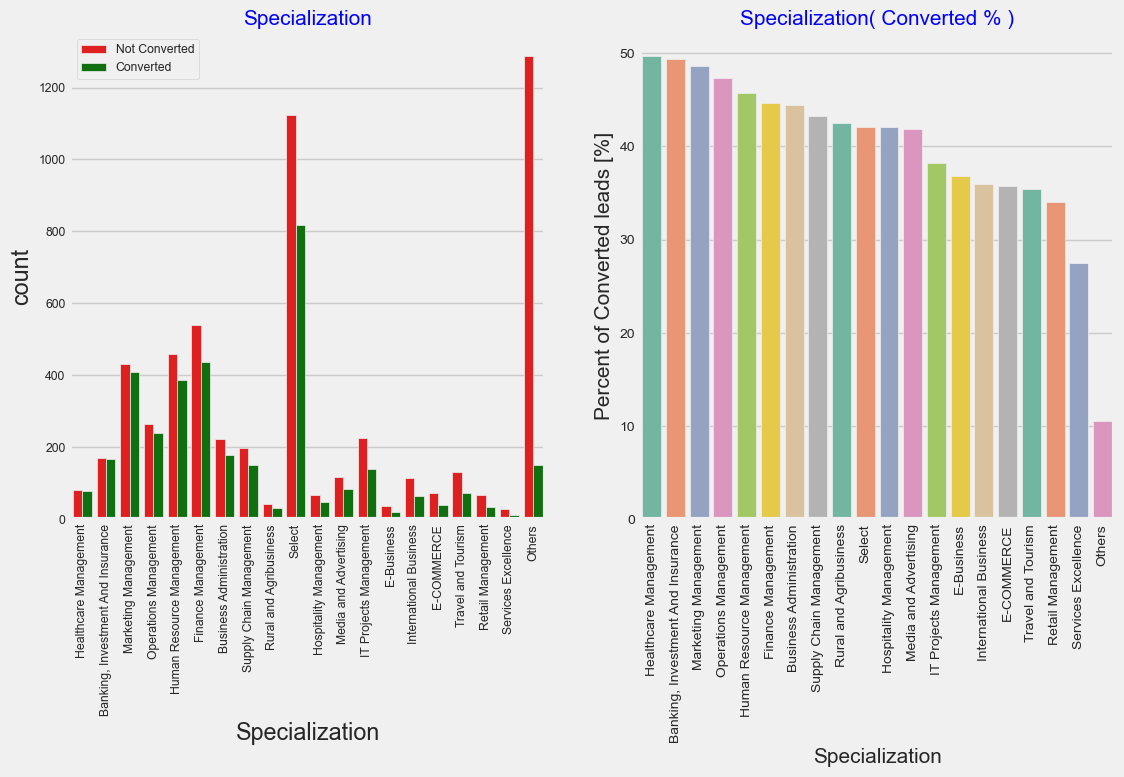

In [493]:
#Run the function to get plot categorical plots
univariate_categorical("Specialization",label_rotation=True)

### Insight:
Most of the leads have not mentioned a specialization and around 28% of those converted
Leads with Finance management and Marketing Management - Over 45% Converted

## occupation

             Occupation  Total Leads   % Values
0            Unemployed         5600  60.606061
1               Unknown         2690  29.112554
2  Working Professional          706   7.640693
3               Student          210   2.272727
4                 Other           16   0.173160
5             Housewife           10   0.108225
6           Businessman            8   0.086580


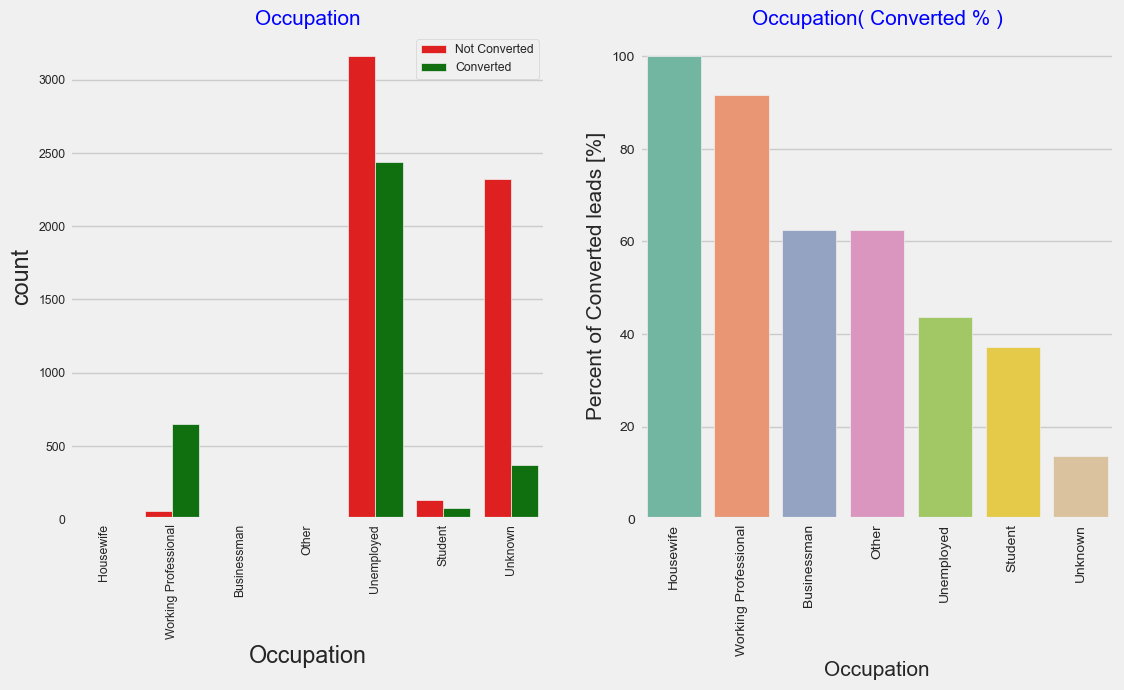

In [494]:
#Run the function to get plot categorical plots
univariate_categorical("Occupation",label_rotation=True)

### Insight
Even if there are fewer housewives, they convert at a 100% rate. The conversion rate is high for employed individuals, company owners, and other groups. Despite reaching the greatest number of people, the conversion rate (40%) is low. Smaller value categories cannot be combined because of the wide variations in their conversion rates. Combining them might provide projections that are off.


## Search, Newspaper, Newspaper Article, Digital Advertisement, ,X Education Forums, Free Copy 

There are just two categories for the following features. We'll assess the skewness of the data and determine whether to eliminate it from model construction.

In [495]:
def pieplot(col):
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    converted = lead[col].value_counts().rename_axis('unique_values').to_frame('counts')
    plt.pie(converted.counts, labels = ["No","Yes"],colors = ['red','green'],autopct='%1.1f%%')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title(col)

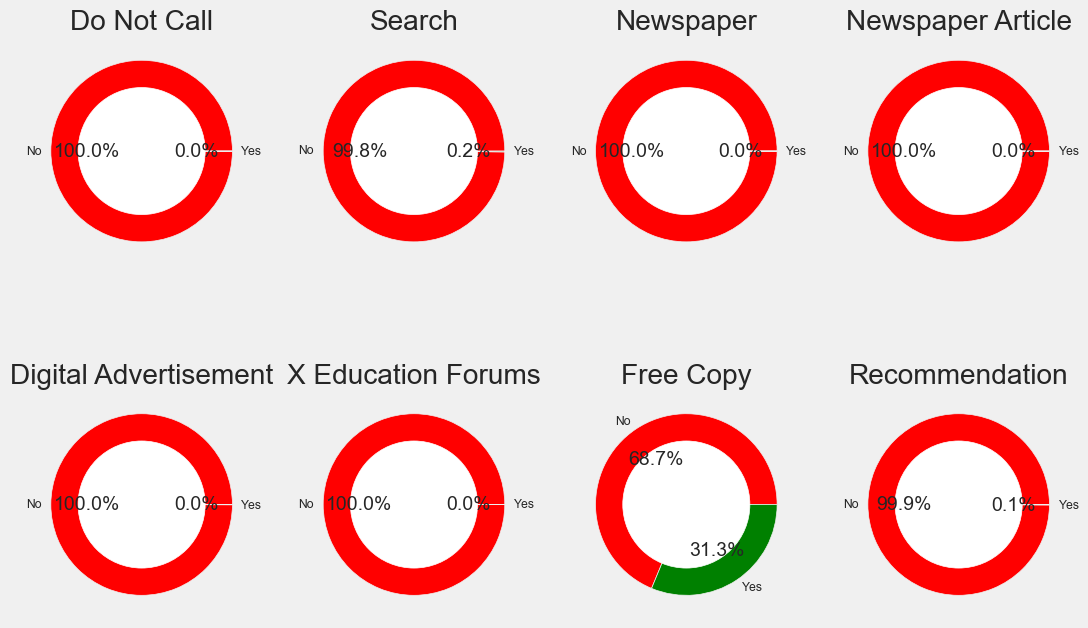

In [496]:
# Lets lookinto the data distribution of the following columns
col = ['Do Not Call','Search', 'Newspaper', 'Newspaper Article', 'Digital Advertisement', 'X Education Forums', 'Free Copy','Recommendation']
plt.figure(figsize = (12,8))
i=1
for each_col in col:
    plt.subplot(2,4,i)
    pieplot(each_col)
    i+=1

  Free Copy  Total Leads   % Values
0        No         6352  68.744589
1       Yes         2888  31.255411


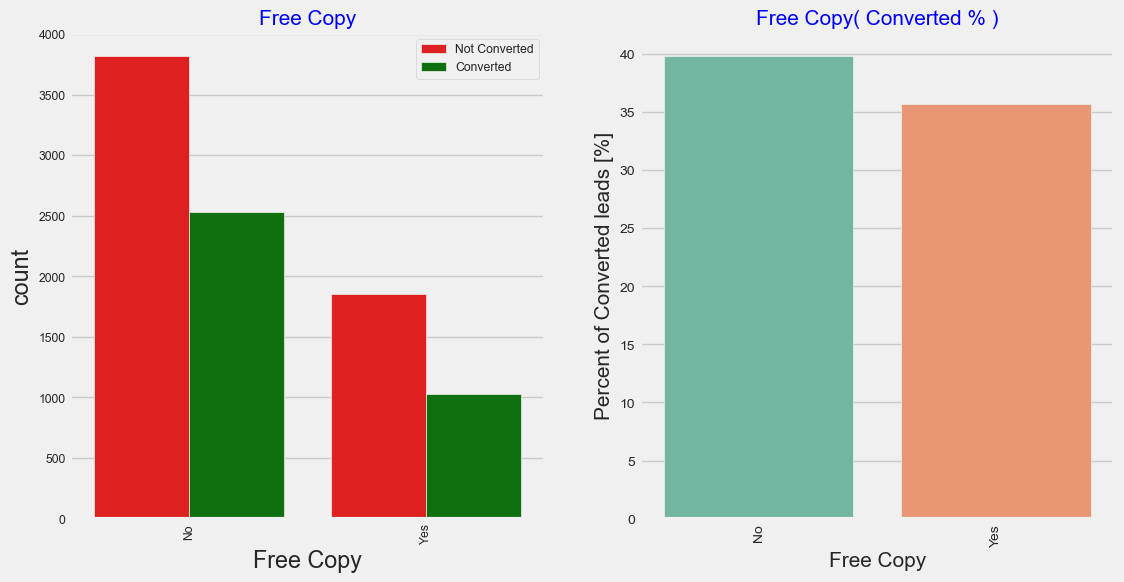

In [497]:
#Run the function to get plot categorical plots
univariate_categorical("Free Copy",label_rotation=True)

### Strategy: 
The data from search, newspapers, newspaper articles, digital ads, X education forums, and suggestions is excessively biassed and ought to be eliminated because it does not improve the model in any way.
The coenversion rate is almost the same, thus giving away a free copy of the Mastery Interview doesn't seem to provide much value. These columns will all be eliminated.


In [498]:
lead.drop(col,axis = 1, inplace = True)
len(lead.columns)

10

## Univariate Analysis - Numerical

In [499]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'Occupation'],
      dtype='object')

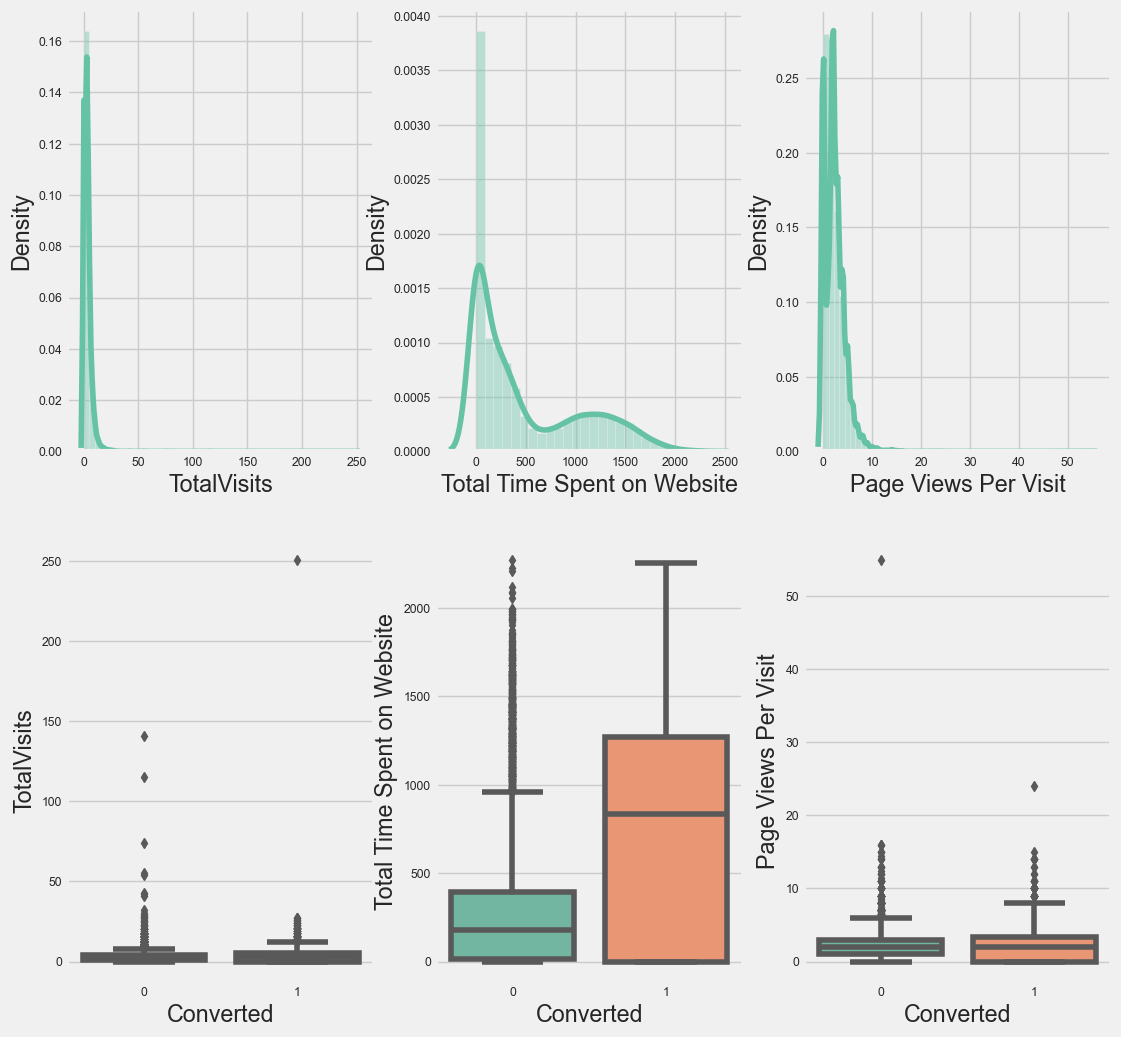

In [500]:
numerical_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
plt.figure(figsize=(12,12))

i=1
for col in numerical_cols:
    plt.subplot(2,3,i)
    sns.distplot(lead[col])
    plt.subplot(2,3,3+i)
    sns.boxplot(y=lead[col], x = lead['Converted'])
    i+=1

### Insight:
TotalVisits and Page Views per Visit has some outliers which needs to be treated.

## Bivariate Analysis

<Figure size 2000x2000 with 0 Axes>

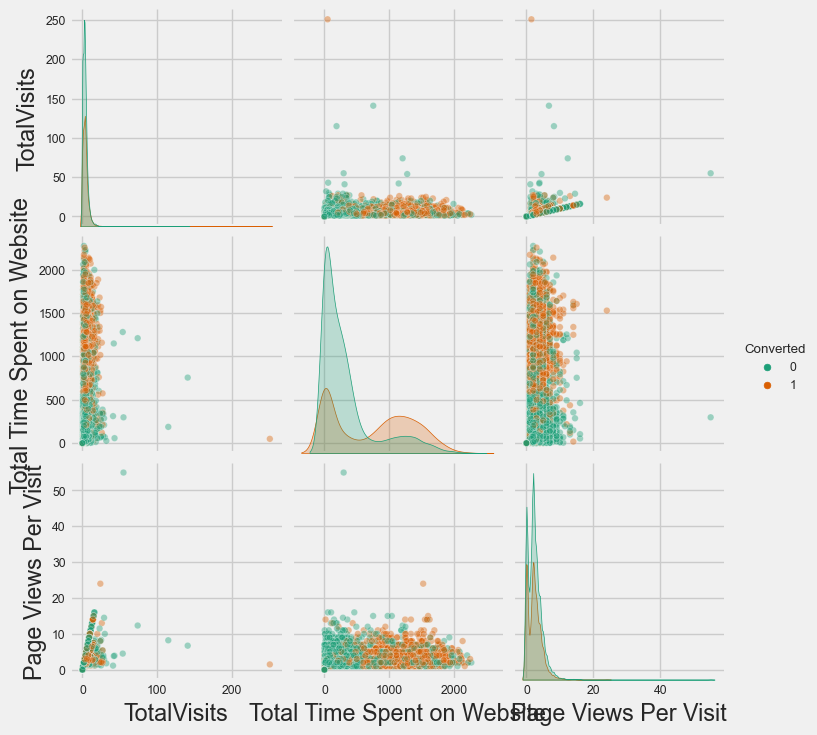

In [501]:
plt.figure(figsize =(20,20))
sns.pairplot(lead[numerical_col],hue="Converted",kind='scatter', plot_kws={'alpha':0.4},palette = 'Dark2')                                  
plt.show()

### Insight:
Data is not normally distributed.

# 5. Data Prepration

## Outliers Treatment 

In [502]:
#Checking the detailed percentile values
lead.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000


In [503]:
numerical_col

array(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'], dtype=object)

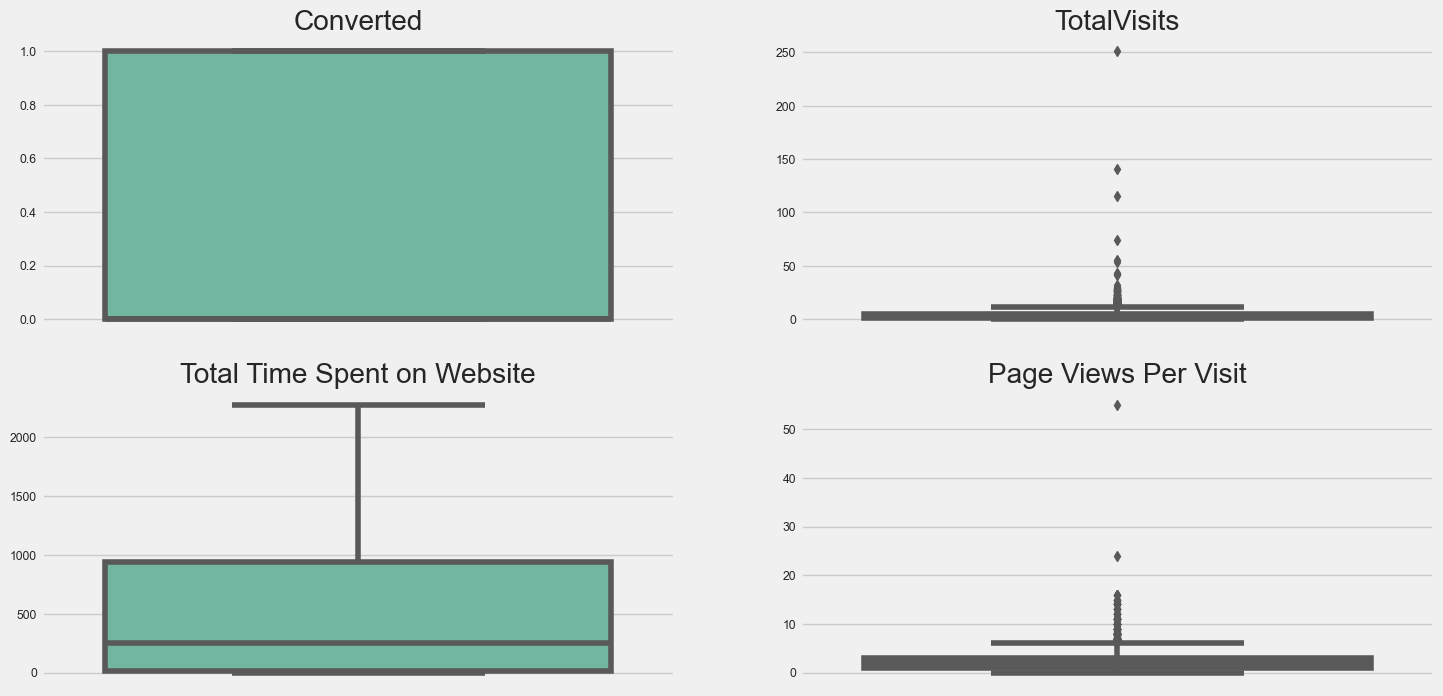

In [504]:
# plotting the numerical column for outlire values.
i=1
plt.figure(figsize=[16,8])
for col in numerical_col:
    plt.subplot(2,2,i)
    sns.boxplot(y=lead[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

### Insignt:
Despite the fact that outliers in TotalVisits and Page Views Per Visit may display valid numbers, they will incorrectly categorise the results and cause problems when inferences are made using the wrong model. The impact of outliers on logistic regression is significant. Therefore, let's choose the 95th percentile as the upper limit for Total Visits and Page Views Per Visit:
There are a lot of different data sets.
The impact of capping to the 95th or 99th percentile will be the same since the 95th and 99th percentiles of these columns are so close together.


In [505]:
#Capping the data at 95% percetile value
Q4 = lead['TotalVisits'].quantile(0.95) # Get 95th quantile
print("Total number of rows getting capped for TotalVisits column : ",len(lead[lead['TotalVisits'] >= Q4]))
lead.loc[lead['TotalVisits'] >= Q4, 'TotalVisits'] = Q4 # outlier capping

Q4 = lead['Page Views Per Visit'].quantile(0.95) # Get 95th quantile
print("Total number of rows getting capped for Page Views Per Visit column : ",len(lead[lead['Page Views Per Visit'] >= Q4]))
lead.loc[lead['Page Views Per Visit'] >= Q4, 'Page Views Per Visit'] = Q4 # outlier capping

Total number of rows getting capped for TotalVisits column :  467
Total number of rows getting capped for Page Views Per Visit column :  604


### Insight
Insight:
The number of rows getting capped are quite high. This is also the reason that we are capping the data instead of deleting it.

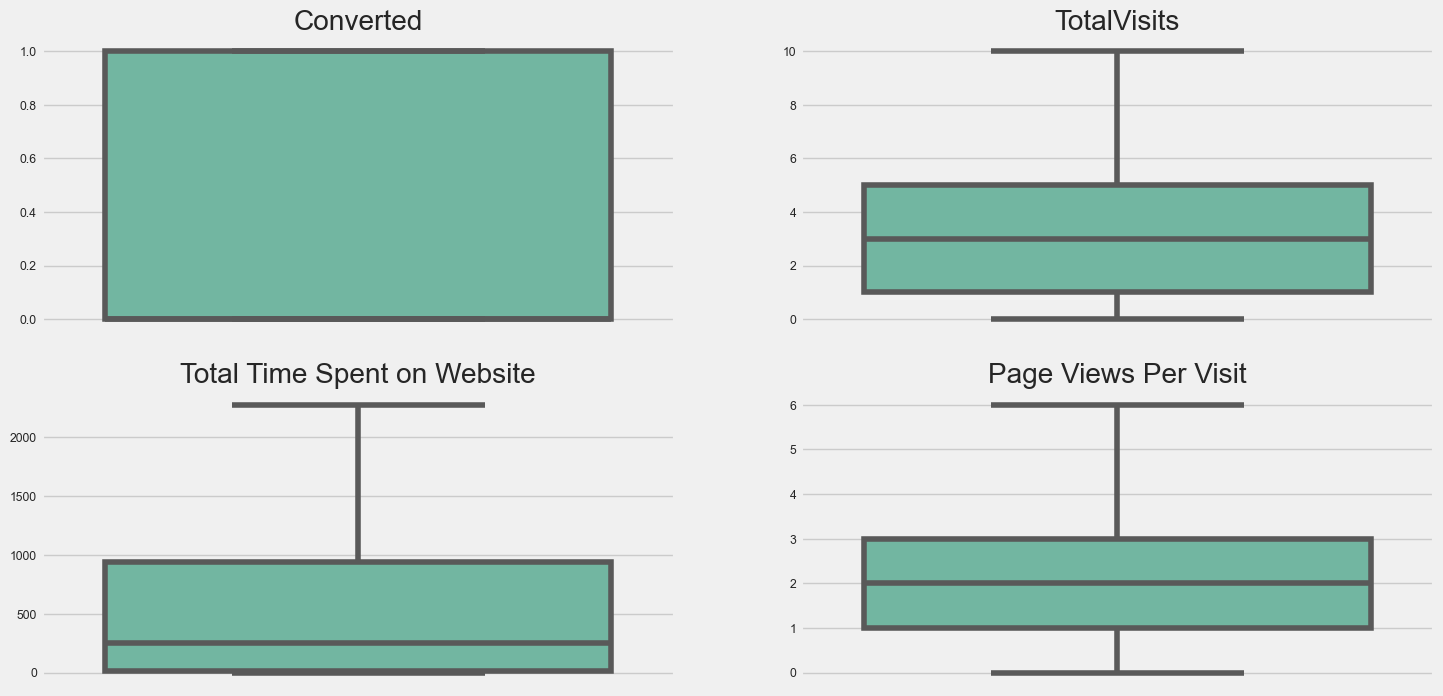

In [506]:
#replotting the graphs to check for outlier treatment
i=1
plt.figure(figsize=[16,8])
for col in numerical_col:
    plt.subplot(2,2,i)
    sns.boxplot(y=lead[col])
    plt.title(col)
    plt.ylabel('')

    i+=1

In [507]:
# Checking the percentile values again 
lead.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.179221,487.698268,2.255105
std,0.486714,2.761219,548.021466,1.779471
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000


### Insight:
Now that we have capped the outliers, let's proceed to data preparation for model building.

## Convert binary Categories

In [508]:
# Checking the unique value counts for categorcial columns
lead.nunique().sort_values()

Do Not Email                      2
Converted                         2
Lead Origin                       5
Occupation                        7
Lead Source                       9
TotalVisits                      11
Last Activity                    11
Specialization                   20
Page Views Per Visit             91
Total Time Spent on Website    1731
dtype: int64

In [509]:
# Checking the categorical values for 'Do Not Email' feature
lead['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [510]:
# List of variables to map

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the lead YES/NO variable list
lead['Do Not Email'] = lead[['Do Not Email']].apply(binary_map)

In [511]:
# rechecking the categorical values for 'Do Not Email' feature
lead['Do Not Email'].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

## Dummy variables

In [512]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Occupation', 'Last Activity', 'Specialization']], drop_first=True)

# Adding the results to the master dataframe
lead = pd.concat([lead, dummy1], axis=1)

lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [513]:
# We have created dummies for the below variables, so we can drop them
lead = lead.drop(['Lead Origin', 'Lead Source', 'Occupation', 'Last Activity', 'Specialization'], axis=1)
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 52 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 6   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 7   Lead Origin_Lead Import                   9240 non-null   uint8  
 8   Lead Origin_Quick Add Form                9240 non-null   uint8  
 9   Lead Source_Facebook                      9240 non-null   uint8  
 10  Lead Source_Google                  

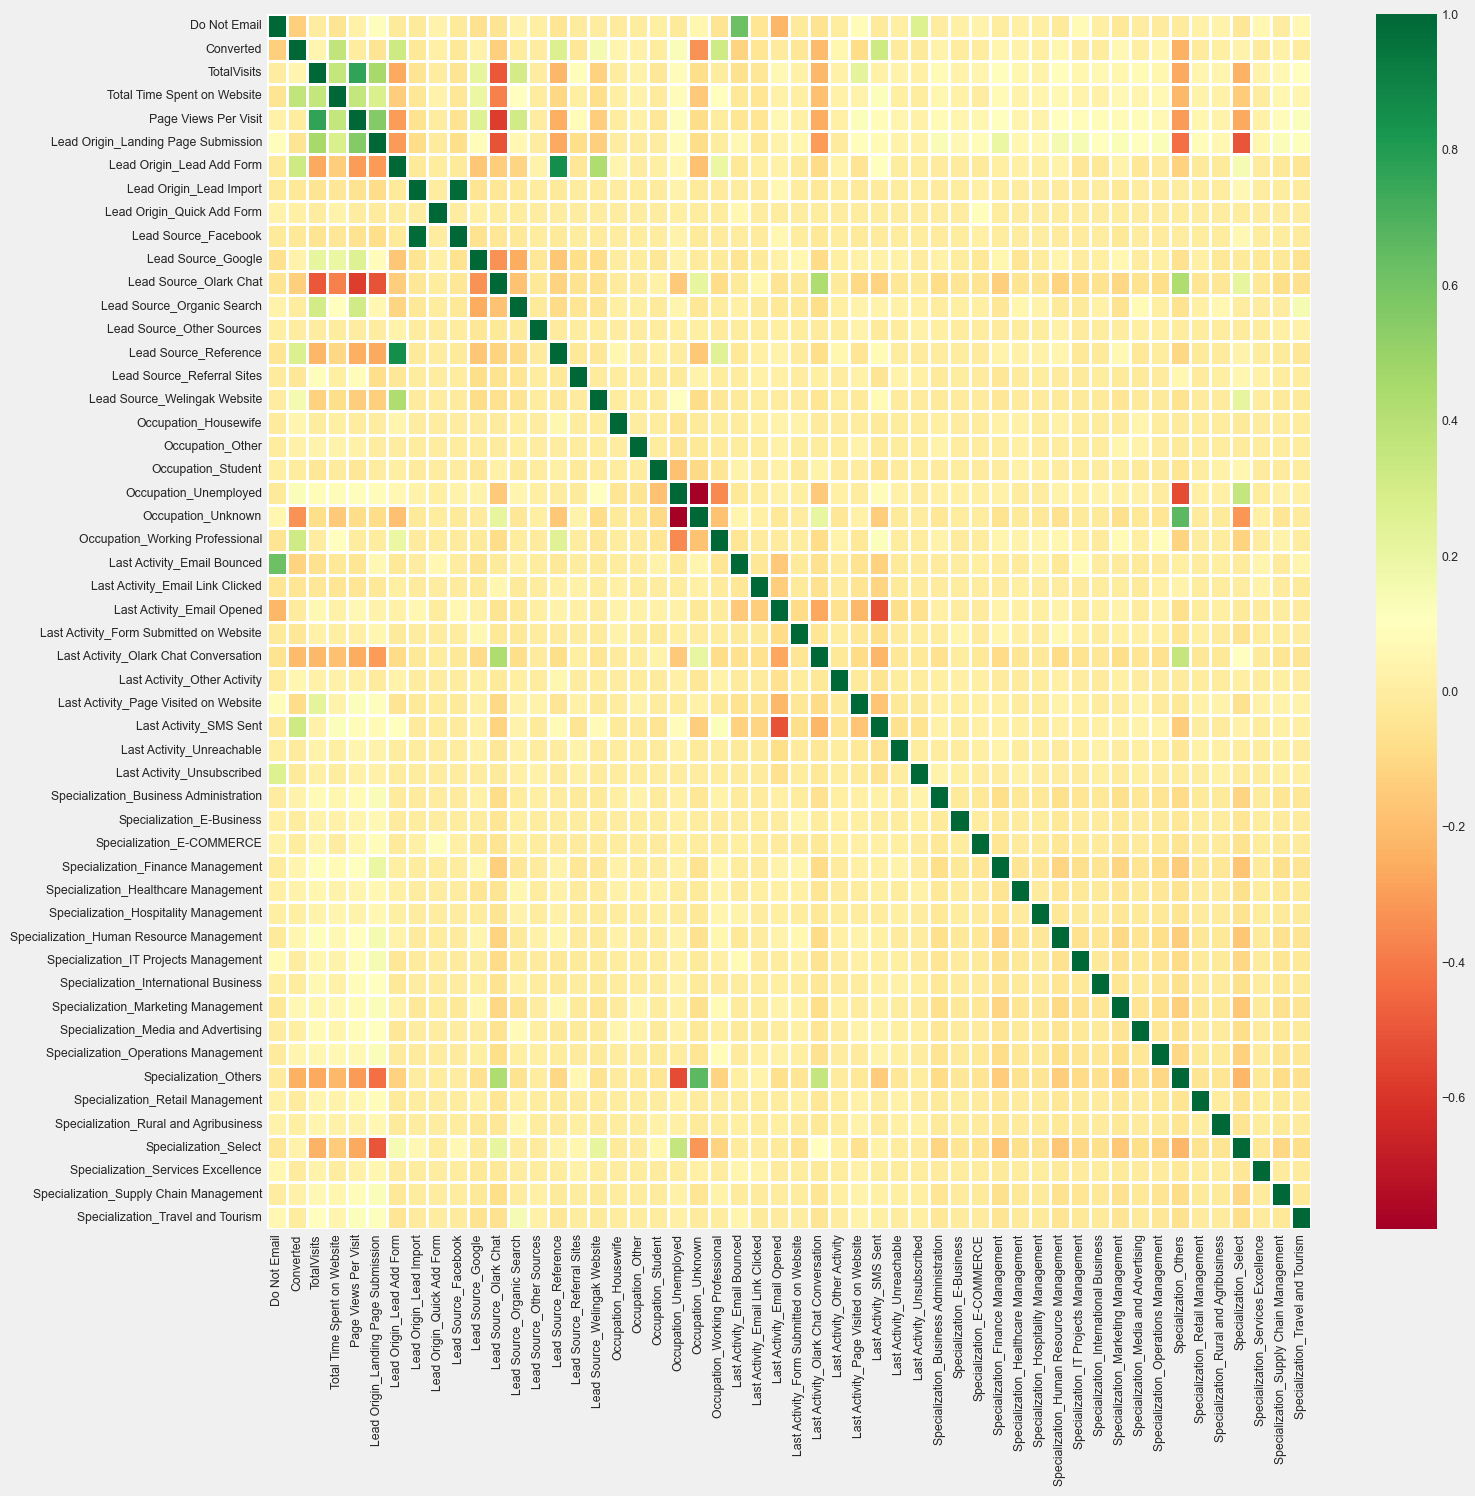

In [514]:
# Visualizing the data using heatmap
plt.figure(figsize=[15,15])
sns.heatmap(lead.corr(), cmap="RdYlGn",linewidth =1)
plt.show()

In [515]:
print('Total number of columns after One-Hot Encoding : ',len(lead.columns))

Total number of columns after One-Hot Encoding :  52


### Insight: 
Heatmap has 51 columns, making it tough to read. Let's have a look at the top 5 positively and adversely associated traits.

In [516]:
corr_lead = lead.corr()
corr_lead = corr_lead.where(np.triu(np.ones(corr_lead.shape),k=1).astype(np.bool))
corr_df = corr_lead.unstack().reset_index()
corr_df.columns =['VAR1','VAR2','Correlation']
corr_df.dropna(subset = ["Correlation"], inplace = True) 
corr_df.sort_values(by='Correlation', ascending=False, inplace=True)

# Top 5 Positive correlated variables
corr_df.head(5)

,VAR1,VAR2,Correlation
475,Lead Source_Facebook,Lead Origin_Lead Import,0.981709
734,Lead Source_Reference,Lead Origin_Lead Add Form,0.853237
210,Page Views Per Visit,TotalVisits,0.767585
2361,Specialization_Others,Occupation_Unknown,0.658088
1196,Last Activity_Email Bounced,Do Not Email,0.618470


In [517]:
corr_df.sort_values(by='Correlation', ascending=True, inplace=True)

# Top 5 Negatively correlated variables
corr_df.head(5)

,VAR1,VAR2,Correlation
1112,Occupation_Unknown,Occupation_Unemployed,-0.794875
576,Lead Source_Olark Chat,Page Views Per Visit,-0.573334
2360,Specialization_Others,Occupation_Unemployed,-0.532500
577,Lead Source_Olark Chat,Lead Origin_Landing Page Submission,-0.512950
1585,Last Activity_SMS Sent,Last Activity_Email Opened,-0.512325


## Train - Test Split

In [518]:
# target variable
Y = lead['Converted']
X = lead.drop(['Converted'], axis=1)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [519]:
#Checking the shape of the created Train & Test DFs
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)

 Shape of X_train is :  (6468, 51)
 Shape of y_train is :  (6468,)
 Shape of X_test is  :  (2772, 51)
 Shape of y_test is  :  (2772,)


## Feature Scaling

Feature Scaling: We standardized the numeric attributes so they have a common mean of zero, if they were measured on different scales

In [520]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1871,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6795,0,0.299722,0.005716,-0.516439,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3516,0,0.662077,-0.691418,0.143543,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8105,0,0.662077,1.365219,1.553761,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3934,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Insight: 
Now that we have our Train and Test databases available and the Train database has been standardised, let's attempt developing a model with Logistic Regression.

# 6. Model building

## RFE for Feature Reduction

In [ ]:
# Using RFE to reduce the feature count from 54 to 20
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)


In [ ]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
#checking which columns remained after RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

In [ ]:
#Columns which have been removed after RFE
X_train.columns[~rfe.support_]

In [ ]:
# Functions to repeat Logictis regression model and VIF calculation repeatedly

# function to build logistic regression model
def build_logistic_model(feature_list):
    X_train_local = X_train[feature_list] # get feature list for VIF
    X_train_sm = sm.add_constant(X_train_local) # required by statsmodels   
    log_model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit() # build model and learn coefficients  
    return(log_model, X_train_sm) # return the model and the X_train fitted with constant 

#function to calculate VIF
def calculate_VIF(X_train):  # Calculate VIF for features
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns # Read the feature names
    vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])] # calculate VIF
    vif['VIF'] = round(vif['VIF'],2)
    vif.sort_values(by='VIF', ascending = False, inplace=True)  
    return(vif) # returns the calculated VIFs for all the features

## Manual Feature Reduction

### Strategy:
The approaches listed below will be used for manual feature reduction to cut features till we achieve a manageable feature count while maintaining the modeal's 80% sensitivity.
1. High P-Value
2. High VIF
3. High negative GLM coeeficient
4. Low Information Value (IV) generated based on WoE (Weight of Evidence)

## Model 1

In [ ]:
features = list(rfe_col) #  Use RFE selected variables
log_model1, X_train_sm1 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model1.summary()

In [ ]:
#Checking VIF values
calculate_VIF(X_train)

## Model 2

### Strategy:
We will remove 'Occupation_Housewife' feature due to high P-value of 0.999

In [ ]:
features.remove('Occupation_Housewife') # Remove 'Occupation_Housewife number' from RFE features list
log_model2, X_train_sm2 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model2.summary()

In [ ]:
#Checking VIF Values
calculate_VIF(X_train[features])

## Model 3

### Strategy:
We will remove 'Specialization_Retail Management' feature due to high P-value of 0.209

In [ ]:
features.remove('Specialization_Retail Management')
log_model3, X_train_sm3 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model3.summary()

In [ ]:
#Checking VIF Values
calculate_VIF(X_train[features])

## Model 4

### Strategy:
We will remove 'Lead Source_Facebook' feature due to high P-Value of 0.204

In [ ]:
features.remove('Lead Source_Facebook')
log_model4, X_train_sm4 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model4.summary()

In [ ]:
#Checking VIF Values
calculate_VIF(X_train[features])

## Model 5

### Strategy:
Due to the high P-Value of 0.174, we will eliminate the 'Specialization_Rural and Agribusiness' feature. The VIF values for each parameter are all less than 3, which shows that the features are not multi-colinear.

In [ ]:
features.remove('Specialization_Rural and Agribusiness')
log_model5, X_train_sm5 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model5.summary()

In [ ]:
#Checking VIF Values
calculate_VIF(X_train[features])

## Model 6

### Strategy:
Every feature has a VIF ≤ 5 and substantial P Values. We will thus examine WoE and the Coefficient value to eliminate parameters next. Since we want more positive features that might signal choosing the best candidate for lead conversion or how to enhance more leads, we will focus on removing negative coefficients..

In [ ]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [ ]:
for col in lead.columns:
    if col in features:
        df, iv = calculate_woe_iv(lead, col, 'Converted')
        print('IV score of column : ',col, " is ", round(iv,4))

### Strategy:
We will remove 'Occupation_Unknown' feature due high negative coefficient. Additionally, Occupation_Unknown is imputed data by treating the null values. It means that the this feature indicates that some leads have not filled this Occupation column. It is difficult to interpret and take action on this feature in future. Thus we will remove this feature first.

In [ ]:
features.remove('Occupation_Unknown')
log_model6, X_train_sm6 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model6.summary()

In [ ]:
#Checking VIF Values
calculate_VIF(X_train[features])

## Model 7

In [ ]:
for col in lead.columns:
    if col in features:
        df, iv = calculate_woe_iv(lead, col, 'Converted')
        print('IV score of column : ',col, " is ", round(iv,4))

### Strategy:
We will remove 'Specialization_Others' due to difficulty of interpretability of the data as againg this "Other" category is combination of various specialization which has been comined in smaller chunks.

In [ ]:
features.remove('Specialization_Others')
log_model7, X_train_sm7 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model7.summary()

In [ ]:
#Checking VIF Values
calculate_VIF(X_train[features])

## Model 8

In [ ]:
for col in lead.columns:
    if col in features:
        df, iv = calculate_woe_iv(lead, col, 'Converted')
        print('IV score of column : ',col, " is ", round(iv,4))

### Strategy:
We will remove 'Specialization_Hospitality Management ' due to lowest WoE value and it also has negative coefficient value.

In [ ]:
features.remove('Specialization_Hospitality Management')
log_model8, X_train_sm8 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model8.summary()

In [ ]:
#Checking VIF Values
calculate_VIF(X_train[features])

## Model 9

### Strategy:
We will remove 'Last Activity_Other Activity' because this is a parameter created by combining multiple smaller categories of Last Activity and % of these data in whole database is less than 0.03%

In [ ]:
features.remove('Last Activity_Other Activity')
log_model9, X_train_sm9 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model9.summary()

In [ ]:
# How many features in the model ?
len(features)

### Inferences: 
As Model No. 9, we have a stable model with all P-values of features being significant and VIF values being less than 3, indicating that there is little multi-colinearity. The majority of feature coefficients are positive. We will choose Model 8 as our final model and test it on the Train and Test Data Sets.

# 7. Model Evaluation : Train Dataset

In [ ]:
# Create a matrix to Print the Accuracy, Sensitivity and Specificity
def lg_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    speci = TN/(TN+FP)
    sensi = TP/(TP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    FPR = FP/(TN + FP)
    FNR = FN/(TP + FN)
    pos_pred_val = TP /(TP+FP)
    neg_pred_val = TN /(TN+FN)
    
    print ("Model Accuracy value is              : ", round(accuracy*100,2),"%")
    print ("Model Sensitivity value is           : ", round(sensi*100,2),"%")
    print ("Model Specificity value is           : ", round(speci*100,2),"%")
    print ("Model Precision value is             : ", round(precision*100,2),"%")
    print ("Model Recall value is                : ", round(recall*100,2),"%")
    print ("Model True Positive Rate (TPR)       : ", round(TPR*100,2),"%")
    print ("Model False Positive Rate (FPR)      : ", round(FPR*100,2),"%")
    print ("Model Poitive Prediction Value is    : ", round(pos_pred_val*100,2),"%")
    print ("Model Negative Prediction value is   : ", round(neg_pred_val*100,2),"%")

## Predicted probability Calculation 

In [ ]:
# Getting the predicted values on the train set
y_train_pred = log_model9.predict(X_train_sm9)
y_train_pred[:10]

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
#Creating a dataframe with the actual Converted flag and the Predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted_IND':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect_IND'] = y_train.index
y_train_pred_final.head()#Finding Optimal Cutoff Point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','Precision','Recall'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted_IND'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec, rec, thresholds = precision_recall_curve(y_train_pred_final['Converted_IND'], y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci, prec[1], rec[1]]
cutoff_df

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(18,8))
sns.set_style("whitegrid")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.335, color='r', linestyle='--') # additing axline
plt.yticks(size=12)
plt.show()

### Inferences:
From the above graph, 0.335 seems to be ideal cut-off points

In [ ]:
y_train_pred_final['final_predicted_1'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.335 else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) # deleting the unnecessary columns
y_train_pred_final.head()

In [ ]:
# Let's assign Lead_score for the leads in Train Data Set
y_train_pred_final['lead_score_1']=(y_train_pred_final['Converted_Prob']*100).astype("int64")
y_train_pred_final.sort_values(by='Converted_Prob',ascending=False)

## Confusion Matrix

In [ ]:
def draw_cm(actual, predicted, cmap):
    cm = metrics.confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True, fmt='.0f', cmap=cmap,
    xticklabels=["Not Converted", "Converted"],
    yticklabels=["Not Converted", "Converted"])
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.show()

draw_cm(y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_1'], "GnBu")


In [ ]:
conf_matrix = confusion_matrix(y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_1'] )

lg_metrics(conf_matrix)

In [ ]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_1'] ) )

In [ ]:
print("F1 Score: {}".format(f1_score(y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_1'])))

### Inferences: 
Model 9 has an accuracy of 80.55% and a sensitivity of 80.29% with a cut off value of 0.335. Sensitivity in this case refers to the number of leads the model correctly detects out of all potential leads who convert. The CEO in this case study has requested more than 80%. The F1 Score and accuracy value of the model are higher for 0s than for 1. This suggests that the algorithm filters out leads that won't convert in order to better correctly estimate leads who won't convert. This inadvertently improved the model's capacity to choose suitable leads for contact.

## ROC Curve

An ROC curve demonstrates several things:

* It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity)
* The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
* The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
# Function to plot ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
# recoring the values FPR, TPR and Thresholds:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted_IND'], y_train_pred_final['Converted_Prob'] , drop_intermediate = False )

In [ ]:
#plotting the ROC curve 
draw_roc(y_train_pred_final['Converted_IND'], y_train_pred_final['Converted_Prob'])

### Inferences:
ROC Curve aread is 0.88, which indicates that the model is good.

## Precision - Recall Trade off 

Precision shows the percentage of leads that really converted out of all leads predicted at 1.
Recall indicates the proportion of all converted leads that were correctly classified as 1. The sensitivity value is the same as this.

The precision-recall trade-off point is used to establish the cut-off point when there is a significant data imbalance. In our case, the data distribution is 62% to 38%. Data imbalance is therefore not a relevant factor.

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted_IND'], y_train_pred_final['Converted_Prob'])

In [ ]:
# Plotting the Precision-Recall Trade off Curve
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.404, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=8)
plt.yticks(size=12)

plt.show()

### Inferences:
The cutoff point appears to be 0.404 based on the Precision-Recall Trade off curve. This threshold value will be used to evaluate test data.

In [ ]:
# plotting the Train dataset again with 0.42 as cutoff
y_train_pred_final['final_predicted_2'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.404 else 0)
y_train_pred_final.head()

In [ ]:
#Plotting the Confusion Matrix
draw_cm( y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_2'], "GnBu")

In [ ]:
#Data based on cutoff received from Precision-Recall Trade off
conf_matrix = confusion_matrix(y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_2'] )
lg_metrics(conf_matrix)

In [ ]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_2'] ) )

### Inferences:
By using the Precision - Recall trade off chart cut-off points, the model output has changed the following way :
* True Positive number has decreased.
* True Negative number has increase
* False Negative number has increase
* False Positive number has decreased


For our purposes, CEO wants to accurately identify the individuals who will turn into leads. Therefore, since the Precision-Recall trade-off strategy lowered True Positive, we cannot apply it. To boost True Positives, we must raise Sensitivity/Recall value. So, we'll pick 0.335 as the cutoff value.

# 8. Model Evaluation : Test Dataset

In [ ]:
# Scaling the test dataset :
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_test.head()

In [ ]:
# Selecting only the columns used in final model of Train Dataset
X_test = X_test[features]
X_test.head()

In [ ]:
#adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.columns

In [ ]:
# Predicting the final test model 
y_test_pred = log_model9.predict(X_test_sm)

In [ ]:
#checking the top 10 rows
y_test_pred[:10]

In [ ]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

In [ ]:
# Putting CustID to index
y_test_df['Prospect_IND'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final= y_pred_final.rename(columns={ 'Converted' : 'Converted_IND'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect_IND','Converted_IND','Converted_Prob'], axis=1)
y_pred_final.head()

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.335 else 0)
y_pred_final.head()

In [ ]:
#Plotting the Confusion Matrix
draw_cm( y_pred_final['Converted_IND'], y_pred_final['final_predicted'], "GnBu")

In [ ]:
conf_matrix = confusion_matrix(y_pred_final['Converted_IND'], y_pred_final['final_predicted'])

lg_metrics(conf_matrix)

### Inferences: 
The sensitivity on Test data is 80.09%, whereas it is 80.29% on Train data. The accuracy percentage is 80.48%. It demonstrates that the model performs well in the test data set as well and is not overtrained.

In [ ]:
# Invoking the functio to draw ROC curve

draw_roc( y_pred_final['Converted_IND'], y_pred_final['Converted_Prob'])

### Inferences: 
A ROC score of 0.88 indicates that the model performed well in the Test dataset.

In [ ]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_pred_final['Converted_IND'], y_pred_final['final_predicted'] ) )

In [ ]:
# Let's assign Lead_score for the leads in Test Data Set : 
y_pred_final['lead_score']=(y_pred_final['Converted_Prob']*100).astype("int64")
y_pred_final.sort_values(by='Converted_Prob',ascending=False)

In [ ]:
# checking the data from top 
y_pred_final.head(5)

In [ ]:
# checking the data from bottom 
y_pred_final.tail(5)

### Inferences: 
To choose which potential leads to prioritise first, utilise the lead score field. The likelihood that the lead will convert increases with the score. The score cut-off should be higher if there are fewer sales professionals available to ensure that those with higher conversion probabilities are contacted further to turn them into potential customers. That is equivalent to increasing the cut-off point to a higher number in order to increase the model's accuracy. The score cut-off may be lowered if the sales team has more resources at its disposal (for instance, interns). The company may accept a higher percentage of false positives when there are more human resources since it will improve customer outreach and, as a result

# 9. Conclusion:

## Model predictorys

In [ ]:
# Let's look into final model features and coefficients 
pd.options.display.float_format = '{:.2f}'.format
final_parameters = log_model9.params[1:]
final_parameters

In [ ]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

top_predictors = final_parameters
top_predictors = 100.0 * (top_predictors / top_predictors.max())
top_predictors

In [ ]:
# Plotting the predictors based on their relative importance
top_predictors_sort = np.argsort(top_predictors,kind='quicksort',order='list of str')
fig = plt.figure(figsize = (12,8))
pos = np.arange(top_predictors_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,6))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_predictors[top_predictors_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[features].columns)[top_predictors_sort], fontsize=13)
ax.set_xlabel('Top Predictors Relative Importance', fontsize=15)
plt.show()

# Model Summary

### Interpretation Several predictor variables in a logistic regression model
In general, numerous predictor variables can be included in a logistic regression model, as shown below:


logit(p) = log(p/(1-p)) = 0 + 1 * X1 +... + n * Xn

Each estimated coefficient is the expected change in the log odds of being a potential lead given a unit increase in the relevant predictor variable while maintaining the other predictor variables constant at a certain value, using our example dataset as a base. The ratio of two probabilities, or the change in chances on a multiplicative scale, given a unit increase in the relevant predictor variable while keeping the other variables constant, is known as an exponentiated coefficient.


### The magnitude and sign of the coefficients loaded in the logit function:¶
logit(p) = log(p/(1-p)) = (3.42 * Lead Origin_Lead Add Form) + (2.84 * Occupation_Working Professional) + (1.99 * Lead Source_Welingak Website) + (1.78 * Last Activity_SMS Sent) + (1.25 * Last Activity_Unsubscribed) + (1.09 * Total Time Spent on Website) + (0.98 * Lead Source_Olark Chat) + (0.84 * Last Activity_Unreachable) + (0.66 * Last Activity_Email Opened) - (0.25 * Lead Origin_Landing Page Submission) -(0.87 * Last Activity_Olark Chat Conversation) - (1.26 * Do Not Email) -1.77

We can create predictions thanks to the estimations. To do this, estimate the combined effects of all predictors for a given scenario, add them up, and then perform a logistic transformation.
Consider a working professional who was identified via the Welingak website, interacted with users on Olark Chat, didn't spend much time there, and asked to be contacted via email.

We can then compute his conversion probability as 3.42 * 0 + 2.84 * 1 + 1.99 * 1 + 1.78 * 0 + 1.25 * 0 + 1.09 * 0 + 0.98 * 0 + 0.84 * 0 + 0.66 * 0 - 0.25 * 0 -0.87 * 1 - 1.26 * 0 -1.77 = 2.84 + 1.99 - 0.87 - 1.77 = 2.19 log(p/(1-p)).

The logistic transformation is:
Probability = 1 / (1 + exp(-x)) = 1 /(1 + exp(- -2.19)) = 1 /(1 + exp(2.2)) = 0.10 = 10%

### Probability Prediction
The estimations allow us to make forecasts. This is accomplished by estimating the effects of all predictors for a specific scenario, adding them up, and applying a logistic transformation.

Consider the case of a working professional who was recognised via the Welingak website, spoke on Olark Chat, spent little time on the website, and requested to be contacted through email.

Then we can calculate his conversion probability as 3.41 * 0 + 2.82 * 1 + 2.34 * 0 + 2.01 * 1 + 1.86 * 0 + 1.32 * 0 + 1.09 * 0 + 0.97 * 0 + 0.93 * 0 + 0.76 * 0 - 0.26 * 0 -0.77 * 1 - 1.24 * 0 -1.86
which is 2.82 + 2.01 - 0.77 - 1.86 = 2.2 which is log(p/(1-p))

The logistic transformation is:
Probability = 1 / (1 + exp(-x)) = 1 /(1 + exp(- -2.2)) = 1 /(1 + exp(2.2)) = 0.143 = 14.3%

### Probability ratios
The marketing team may occasionally need to get odds rather than probability since the concept of odds ratios is more social than rational.

We must first define odds, which is defined as the ratio of the chance of two occurrences that are mutually incompatible, in order to comprehend odds ratios. Take into account the 10% lead conversion possibility we previously predicted in the probabilities section. The probabilities are 10% vs. 90% since the lead conversion chance is 10%, and the non-conversion probability is 100% - 10% = 90%. We obtain 0.11 versus 1, which we can simply write as 0.11, when we divide both sides by 90%. Therefore, 0.11 odds is just another way of saying that there is a 10% possibility of lead conversion.


Similarly, leaving other categorical and numerical factors constant, the odds of a lead being converted for a Working Professional (Working Professional = 1) over the odds of a lead being converted for non-working professionals (Working Professional = 0) is exp(.2.84) = 17.11.

When all other variables are set to zero, log(p/(1-p)) = 17.11.

We may utilise odds ratios to detect possible lead conversions by comparing people' profiles.